<h2 style="text-align:center;">Regularization in Linear Regression</h2>

Regularization is a technique used in **Linear Regression** to prevent **overfitting** 
and improve model generalization by adding a penalty to large coefficients.

- **Why Regularization?**  
  - When we have many features, some coefficients become very large.  
  - Large coefficients → Overfitting (model memorizes training data).  
  - Regularization reduces coefficient values to control model complexity.  

**Types of Regularization:**
1. **Ridge Regression (L2 Regularization):**
   - Adds penalty = sum of squared coefficients (L2 norm).  
   - Shrinks coefficients towards zero but never exactly zero.  
   - Helps when multicollinearity exists.  

2. **Lasso Regression (L1 Regularization):**
   - Adds penalty = sum of absolute coefficients (L1 norm).  
   - Can shrink coefficients to **exactly zero** → acts as feature selection.  

3. **ElasticNet (L1 + L2):**
   - Combines both Ridge & Lasso.  
   - Balances between coefficient shrinkage and feature elimination.  

We will use the **Auto MPG dataset (`car-mpg.csv`)** to predict the car's **Miles Per Gallon (mpg)** using Ridge, Lasso, and ElasticNet regression.


In [1]:
#Import numerical libraries
import pandas as pd
import numpy as np

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

<h2 style="text-align:center;">Dataset Overview</h2>

We are using the **Car MPG Dataset (`car-mpg.csv`)**.  
- The dataset contains information about cars such as **mpg (target), horsepower, weight, acceleration, displacement, model year, cylinders, origin** etc.  
- Our goal is to **predict `mpg` (miles per gallon)** using multiple features.  

We will:
1. Load the dataset.
2. Inspect first few rows.
3. Check basic statistics & missing values.


In [2]:
# Load dataset
data = pd.read_csv("../data/car-mpg.csv")

# Preview the first 5 rows
data.head()  # ➤ shows first rows


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
# Dataset info
data.info()  # ➤ check datatypes and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [4]:
# Summary statistics
data.describe()  # ➤ check numeric column distributions


,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [5]:
# Check for missing values
data.isnull().sum()  # ➤ count missing values in each column


mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

<h2 style="text-align:center;">Data Cleaning & Preprocessing</h2>

Steps followed to clean the dataset:  

1. **Drop Irrelevant Feature** → Removed `car_name` since it’s not useful for prediction.  
2. **Replace Origin Codes** → Converted numerical `origin` (1,2,3) into categories (`america`, `europe`, `asia`).  
3. **One-Hot Encoding** → Converted categorical `origin` into dummy variables.  
4. **Handle Missing Values** → Replaced `?` with `NaN`, then filled missing values with **median** of each column.  


In [6]:
# Drop irrelevant column
data = data.drop(['car_name'], axis=1)


In [7]:
# Replace origin codes with categories
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [8]:
# One-hot encoding for origin
data = pd.get_dummies(data, columns=['origin'])

In [9]:

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Convert all columns to numeric where possible
data = data.apply(pd.to_numeric, errors='ignore')

# Fill missing values with median for numeric columns only
for col in data.columns:
    if data[col].dtype != 'object':  # numeric columns only
        data[col] = data[col].fillna(data[col].median())

data.head()

C:\Users\MUBASSHIR\AppData\Local\Temp\ipykernel_16684\3113199128.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False


In [10]:

# Fill missing values with median
data = data.apply(lambda x: x.fillna(x.median()), axis=0)

In [11]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False


<h2 style="text-align:center;">Train-Test Split and Scaling</h2>

Now we separate the independent (X) and dependent (y) variables.  
After that, we scale them so all features are on the same range.


In [12]:

# ➤ Splitting independent (X) and dependent (y) variables
X = data.drop(['mpg'], axis=1)   # independent variables
y = data[['mpg']]                # dependent variable

# ➤ Scaling the data
X_s = preprocessing.scale(X)   # scaling X
X_s = pd.DataFrame(X_s, columns=X.columns)  # back to DataFrame for readability

y_s = preprocessing.scale(y)   # scaling y
y_s = pd.DataFrame(y_s, columns=y.columns)  # back to DataFrame

# ➤ Splitting into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.30, random_state=1)

# ➤ Check the shape
X_train.shape, y_train.shape

((278, 10), (278, 1))

<h2 style="text-align:center;">Linear Regression (Baseline Model)</h2>

We first fit a simple linear regression model on the training data.  
Then, we extract the **coefficients** (for each feature) and the **intercept** of the model.  


In [13]:
from sklearn.linear_model import LinearRegression

# ➤ Initialize and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# ➤ Print coefficients for each feature
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

# ➤ Print intercept
intercept = regression_model.intercept_[0]
print(f"The intercept is {intercept}")


The coefficient for cyl is 0.32861754506846
The coefficient for disp is 0.3586663782203616
The coefficient for hp is -0.23039082100182615
The coefficient for wt is -0.7210216002465518
The coefficient for acc is 0.020642511596224707
The coefficient for yr is 0.37273683281912257
The coefficient for car_type is 0.37717522653816454
The coefficient for origin_america is -15582375391443.475
The coefficient for origin_asia is -12842504957614.494
The coefficient for origin_europe is -12258202649930.533
The intercept is 0.020347392754016945


<h2 style="text-align:center;">Ridge Regression (L2 Regularization)</h2>

Ridge regression applies an **L2 penalty** to shrink coefficients, helping to reduce multicollinearity and overfitting.  
The penalty is controlled by the parameter **alpha (λ)**.  


In [14]:
from sklearn.linear_model import Ridge

# ➤ Initialize Ridge model with alpha (penalty term)
ridge_model = Ridge(alpha=0.3)

# ➤ Fit the model on training data
ridge_model.fit(X_train, y_train)

# ➤ Print Ridge coefficients
print("Ridge model coefficients:")
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {ridge_model.coef_[0][idx]}")


Ridge model coefficients:
The coefficient for cyl is 0.31649043447756986
The coefficient for disp is 0.3132070679322369
The coefficient for hp is -0.22876024884299925
The coefficient for wt is -0.701094474769561
The coefficient for acc is 0.012958509258978852
The coefficient for yr is 0.3744735168408098
The coefficient for car_type is 0.37725608152844553
The coefficient for origin_america is -0.07423623526060674
The coefficient for origin_asia is 0.04441038876926636
The coefficient for origin_europe is 0.047840312668603696


<h2 style="text-align:center;">Lasso Regression (L1 Regularization)</h2>

Lasso regression applies an **L1 penalty** which not only shrinks coefficients but can also reduce some to zero.  
This makes Lasso useful for **feature selection** in addition to reducing overfitting.  
The penalty is controlled by the parameter **alpha (λ)**.  


In [15]:
from sklearn.linear_model import Lasso

# ➤ Initialize Lasso model with alpha (penalty term)
lasso_model = Lasso(alpha=0.1)

# ➤ Fit the model on training data
lasso_model.fit(X_train, y_train)

# ➤ Print Lasso coefficients
print("Lasso model coefficients:")
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {lasso_model.coef_[idx]}")


Lasso model coefficients:
The coefficient for cyl is -0.0
The coefficient for disp is -0.0
The coefficient for hp is -0.016902871020081155
The coefficient for wt is -0.5189001294663317
The coefficient for acc is 0.0
The coefficient for yr is 0.28138240797526426
The coefficient for car_type is 0.12784890489871115
The coefficient for origin_america is -0.016426472621561987
The coefficient for origin_asia is 0.0
The coefficient for origin_europe is 0.0


<h2 style="text-align:center;">ElasticNet Regression (L1 + L2 Regularization)</h2>

ElasticNet combines **Lasso (L1)** and **Ridge (L2)** penalties.  
- From **L1**, it inherits the ability to shrink some coefficients to zero (**feature selection**).  
- From **L2**, it inherits the ability to shrink large coefficients and reduce model complexity (**prevent overfitting**).  

The penalty strength is controlled by **alpha (λ)**,  
and the balance between L1 and L2 is controlled by **l1_ratio** (0 = only Ridge, 1 = only Lasso).


In [16]:
from sklearn.linear_model import ElasticNet

# ➤ Initialize ElasticNet model with alpha (penalty term) and l1_ratio
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# ➤ Fit the model on training data
elasticnet_model.fit(X_train, y_train)

# ➤ Print ElasticNet coefficients
print("ElasticNet model coefficients:")
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {elasticnet_model.coef_[idx]}")


ElasticNet model coefficients:
The coefficient for cyl is -0.0
The coefficient for disp is -0.0
The coefficient for hp is -0.10219799061543995
The coefficient for wt is -0.4142457377970827
The coefficient for acc is 0.0
The coefficient for yr is 0.2995246136415957
The coefficient for car_type is 0.1612518762746751
The coefficient for origin_america is -0.06481083412221576
The coefficient for origin_asia is 0.0
The coefficient for origin_europe is 0.0


<h2 style="text-align:center;">Model Evaluation: Linear vs Regularization</h2>

We now compare the performance of all four models using **Mean Squared Error (MSE)** 
and **R² Score** on the test dataset.


In [17]:
# ➤ Evaluation of Linear, Ridge, Lasso, ElasticNet models

from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_linear = regression_model.predict(X_test).ravel()
y_pred_ridge = ridge_model.predict(X_test).ravel()
y_pred_lasso = lasso_model.predict(X_test).ravel()
y_pred_elastic = elasticnet_model.predict(X_test).ravel()

# Metrics function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MSE: {mse:.3f}, R²: {r2:.3f}")

# Evaluate all
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_elastic, "Elastic Net Regression")


Linear Regression -> MSE: 0.144, R²: 0.850
Ridge Regression -> MSE: 0.142, R²: 0.852
Lasso Regression -> MSE: 0.156, R²: 0.838
Elastic Net Regression -> MSE: 0.145, R²: 0.849


<h2 style="text-align:center;">4. Model Parameter Tuning & Diagnostics</h2>


In [18]:
# ➤ Combine X_train and y_train for statsmodels (expects both in one DataFrame)
data_train_test = pd.concat([X_train, y_train], axis=1)
data_train_test.head()


,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [19]:
# ➤ Import statsmodels and build OLS model (Adjusted R², p-values etc.)
import statsmodels.formula.api as smf

ols1 = smf.ols(
    formula='mpg ~ cyl + disp + hp + wt + acc + yr + car_type + origin_america + origin_europe + origin_asia',
    data=data_train_test
).fit()

# ➤ View model coefficients
ols1.params


Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [20]:
# ➤ Full model summary (includes R², Adjusted R², p-values, F-stat etc.)
print(ols1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           3.12e-99
Time:                        18:09:35   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [21]:
# ➤ Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
y_pred = regression_model.predict(X_test).ravel()   # flatten predictions
y_true = y_test.values.ravel()      
# flatten actuals

mse  = np.mean((y_pred - y_true) ** 2)

import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error (RMSE): {:.3f}'.format(rmse))


Root Mean Squared Error (RMSE): 0.379


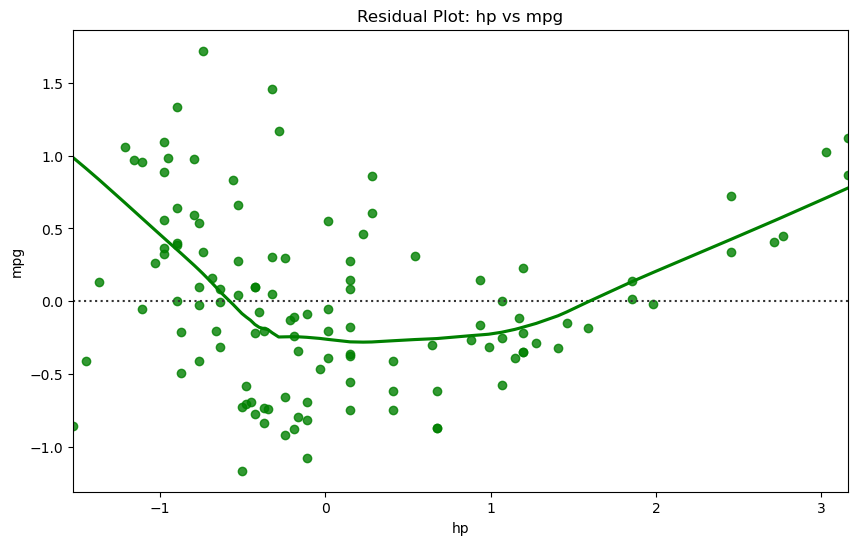

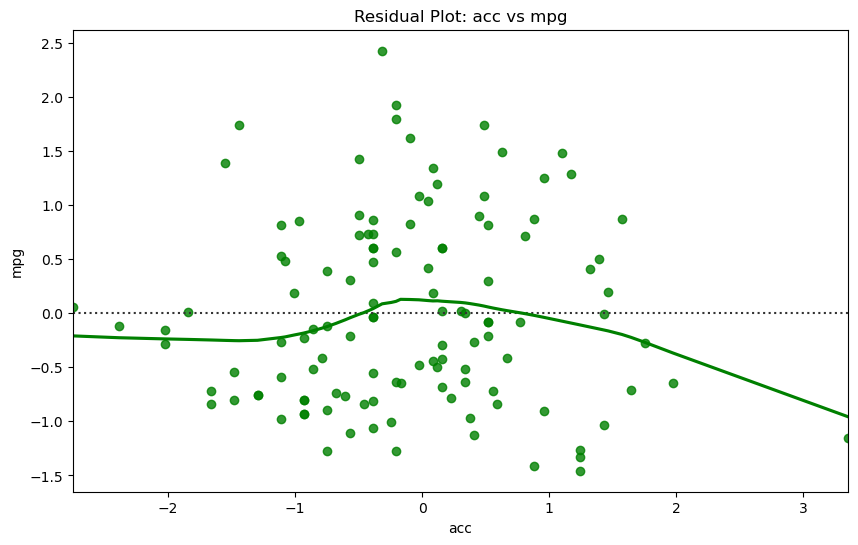

In [22]:
# ➤ Residual plots help check model assumptions
fig = plt.figure(figsize=(10,6))
sns.residplot(x=X_test['hp'], y=y_test['mpg'], color='green', lowess=True)
plt.title("Residual Plot: hp vs mpg")

fig = plt.figure(figsize=(10,6))
sns.residplot(x=X_test['acc'], y=y_test['mpg'], color='green', lowess=True)
plt.title("Residual Plot: acc vs mpg")
plt.show()


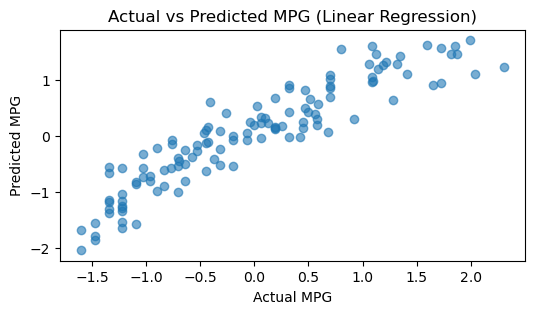

In [23]:
# ➤ Compare predicted vs actual mpg for test data
y_pred = regression_model.predict(X_test).ravel()

plt.figure(figsize=(6,3))
plt.scatter(y_test['mpg'], y_pred, alpha=0.6)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Linear Regression)")
plt.show()


<h2 style="text-align:center;">5. Inference</h2>


- **Both Ridge & Lasso** regularization perform very well on this dataset.  
- Ridge regression shows a **slightly better performance** compared to Lasso.  
- The scatter plot of **Actual vs Predicted MPG** demonstrates a strong positive correlation —  
  predictions are close to actual values.  
- RMSE value indicates that the model’s average prediction error is quite low.  
- Adjusted R² from the OLS summary confirms that the model explains a significant proportion of variance  
  in `mpg` without overfitting.  
- Residual plots show no major deviations, validating model assumptions (linearity & homoscedasticity).  

✅ **Conclusion:**  
This regression pipeline (Linear + Ridge + Lasso + ElasticNet) provides reliable predictions of car mileage (`mpg`).  
Among them, **Ridge regression** emerges as the most stable model for this dataset.


In [25]:
# --- Save all models as pipelines (with scaler) ---
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Ridge Regression": make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    "Lasso Regression": make_pipeline(StandardScaler(), Lasso(alpha=0.1)),
    "ElasticNet Regression": make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))
}

# Fit each pipeline on the full data (X, y)
for name, pipe in models.items():
    pipe.fit(X, y.values.ravel())

# Save all models to one pickle file
with open("../models/all_regression_models.pkl", "wb") as f:
    pickle.dump(models, f)
print("✅ All models (with scaler) saved to all_regression_models.pkl")


✅ All models (with scaler) saved to all_regression_models.pkl
